In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2  
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import os

%pip install nbformat
%pip install import_ipynb

import import_ipynb

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


100%|██████████| 50000/50000 [00:21<00:00, 2344.01it/s]


Text(0.5, 1.0, 'Real and Fake Images in GrayScale')

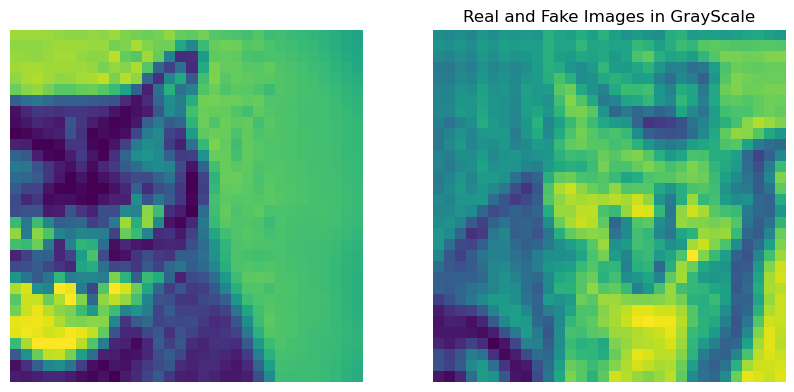

In [3]:
train_fake = '../archive/train/FAKE'
train_real = '../archive/train/REAL'
test_fake = '../archive/test/FAKE'
test_real = '../archive/test/REAL'
image_size = 32

for image in tqdm(os.listdir(train_fake)): 
    path = os.path.join(train_fake, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten() 
    norm = np.zeros((800,800))
    img = cv2.normalize(img, norm, 0, 255, cv2.NORM_MINMAX)  
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(train_real)): 
    path = os.path.join(train_real, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten()
    norm2 = np.zeros((800,800))
    img2 = cv2.normalize(img2, norm, 0, 255, cv2.NORM_MINMAX)   
    np_img2=np.asarray(img2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("Real and Fake Images in GrayScale")

In [4]:
def train_data():
    train_data_fake = [] 
    train_data_real=[]
    for image1 in tqdm(os.listdir(train_fake)): 
        path = os.path.join(train_fake, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        norm = np.zeros((800,800))
        img1 = cv2.normalize(img1, norm, 0, 255, cv2.NORM_MINMAX)
        train_data_fake.append(img1) 
    for image2 in tqdm(os.listdir(train_real)): 
        path = os.path.join(train_real, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        norm = np.zeros((800,800))
        img2 = cv2.normalize(img2, norm, 0, 255, cv2.NORM_MINMAX)
        train_data_real.append(img2) 
    
    train_data = np.concatenate((np.asarray(train_data_fake),np.asarray(train_data_real)),axis=0)
    return train_data 

def test_data():
    test_data_fake = [] 
    test_data_real=[]
    for image1 in tqdm(os.listdir(test_fake)): 
        path = os.path.join(test_fake, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_fake.append(img1) 
    for image2 in tqdm(os.listdir(test_real)): 
        path = os.path.join(test_real, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_real.append(img2) 
    
    test_data = np.concatenate((np.asarray(test_data_fake),np.asarray(test_data_real)),axis=0) 
    return test_data 

In [5]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 10000/10000 [00:01<00:00, 7283.20it/s]


In [6]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

z1 = np.zeros(50000)
o1 = np.ones(50000)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10000)
o = np.ones(10000)
Y_test = np.concatenate((o, z), axis=0)

y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (120000, 32, 32)
Y shape:  (120000, 1)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny))

from sklearn.linear_model import LogisticRegression

logreg =  LogisticRegression()
results = logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

score = logreg.score(x_test, y_test)
print("logistic regression accuracy: " + str(score))

logistic regression accuracy: 0.9406111111111111
